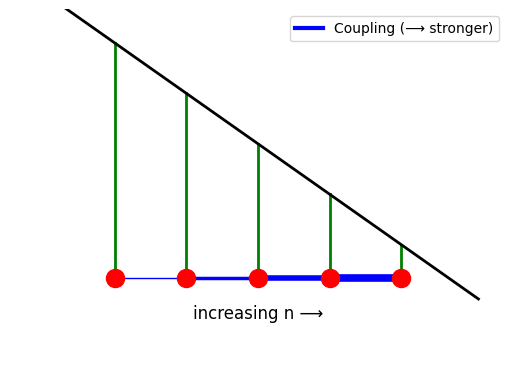

In [71]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.lines import Line2D  # for custom legend

# Parameters
num_pendulums = 5
plane_angle_deg = -30  # slope: higher on left, lower on right
plane_angle = np.radians(plane_angle_deg)
spacing = 1.5  # spacing between pendulums
bob_target_y = -2  # all bobs at this y

# Rotation matrix
cos_a = np.cos(plane_angle)
sin_a = np.sin(plane_angle)

def rotate(x, y, angle):
    """Rotate (x, y) counterclockwise by angle radians."""
    xr = x * cos_a - y * sin_a
    yr = x * sin_a + y * cos_a
    return xr, yr

# Generate pendulum data
x_anchors, y_anchors = [], []
x_bobs, y_bobs = [], []

for i in range(num_pendulums):
    local_x = (i - (num_pendulums - 1) / 2) * spacing
    xa, ya = rotate(local_x, 0, plane_angle)

    xb = xa
    yb = bob_target_y
    rod_length = ya - yb

    x_anchors.append(xa)
    y_anchors.append(ya)
    x_bobs.append(xb)
    y_bobs.append(yb)

# Plotting
fig, ax = plt.subplots()


# Draw spring connectors between bobs (before rods/bobs so they appear behind)
for i in range(num_pendulums - 1):
    x0, y0 = x_bobs[i], y_bobs[i]
    x1, y1 = x_bobs[i + 1], y_bobs[i + 1]
    linewidth = 1 + i * 1.5  # increasing thickness
    ax.plot([x0, x1], [y0, y1], 'b-', linewidth=linewidth)

# Draw pendulums (rods and bobs)
for xa, ya, xb, yb in zip(x_anchors, y_anchors, x_bobs, y_bobs):
    ax.plot([xa, xb], [ya, yb], 'g-',linewidth=2)              # rod
    ax.plot(xb, yb, 'ro', markersize=13)           # larger bob

# Draw inclined plane (no label)
plane_x = [-4, 4]
plane_y = [x * np.tan(plane_angle) for x in plane_x]
ax.plot(plane_x, plane_y, 'k-', linewidth=2)

# Custom legend for spring coupling
spring_legend = Line2D([0], [0], color='blue', linewidth=3, label='Coupling (⟶ stronger)')
ax.legend(handles=[spring_legend])

# Clean visual: no grid, no axis ticks
ax.set_xlim(-4.5, 4.5)
ax.set_ylim(-3.5, 2)
ax.set_xticks([])
ax.set_yticks([])
ax.grid(False)

# (Optional) Remove box frame (spines)
for spine in ax.spines.values():
    spine.set_visible(False)

ax.text(0, -2.6, "increasing n ⟶", ha='center', fontsize=12)

# plt.show()
plt.savefig("./img/pendulums-dsc.png", format="png")


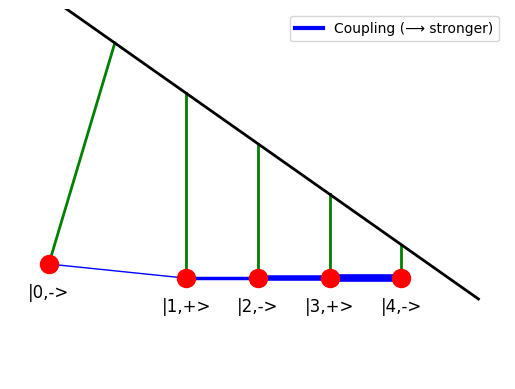

In [99]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.lines import Line2D

# Parameters
num_pendulums = 5
plane_angle_deg = -30
plane_angle = np.radians(plane_angle_deg)
spacing = 1.5
bob_target_y = -2
theta_disp = np.radians(-20)  # angular displacement of first pendulum

# Rotation matrix
cos_a = np.cos(plane_angle)
sin_a = np.sin(plane_angle)

def rotate(x, y, angle):
    xr = x * cos_a - y * sin_a
    yr = x * sin_a + y * cos_a
    return xr, yr

# Step 1: Build all pendulums vertically
x_anchors, y_anchors = [], []
x_bobs, y_bobs = [], []
rod_lengths = []

for i in range(num_pendulums):
    local_x = (i - (num_pendulums - 1) / 2) * spacing
    xa, ya = rotate(local_x, 0, plane_angle)
    xb = xa
    yb = bob_target_y
    L = ya - yb  # vertical rod length

    x_anchors.append(xa)
    y_anchors.append(ya)
    x_bobs.append(xb)
    y_bobs.append(yb)
    rod_lengths.append(L)

# Step 2: Displace first pendulum
xa = x_anchors[0]
ya = y_anchors[0]
L = rod_lengths[0]

# Apply angular displacement θ from vertical
xb = xa + L * np.sin(theta_disp)
yb = ya - L * np.cos(theta_disp)

# Replace bob position
x_bobs[0] = xb
y_bobs[0] = yb

# Plotting
fig, ax = plt.subplots()

# Draw spring connectors
for i in range(num_pendulums - 1):
    x0, y0 = x_bobs[i], y_bobs[i]
    x1, y1 = x_bobs[i + 1], y_bobs[i + 1]
    linewidth = 1 + i * 1.5
    ax.plot([x0, x1], [y0, y1], 'b-', linewidth=linewidth)

# Draw pendulums
for xa, ya, xb, yb in zip(x_anchors, y_anchors, x_bobs, y_bobs):
    ax.plot([xa, xb], [ya, yb], 'g-', linewidth=2)
    ax.plot(xb, yb, 'ro', markersize=13)

# Inclined plane
plane_x = [-4, 4]
plane_y = [x * np.tan(plane_angle) for x in plane_x]
ax.plot(plane_x, plane_y, 'k-', linewidth=2)

# Legend
spring_legend = Line2D([0], [0], color='blue', linewidth=3, label='Coupling (⟶ stronger)')
ax.legend(handles=[spring_legend])

# Clean visuals
ax.set_xlim(-4.5, 4.5)
ax.set_ylim(-3.5, 2)
ax.set_xticks([])
ax.set_yticks([])
ax.grid(False)
for spine in ax.spines.values():
    spine.set_visible(False)

# Label for increasing n
# ax.text(0, -3, "increasing n ⟶", ha='center', fontsize=12)

# Labels
ax.text(x_bobs[0], y_bobs[0] - 0.5, "|0,->", ha='center', fontsize=12)
ax.text(x_bobs[1], y_bobs[1] - 0.5, "|1,+>", ha='center', fontsize=12)
ax.text(x_bobs[2], y_bobs[2] - 0.5, "|2,->", ha='center', fontsize=12)
ax.text(x_bobs[3], y_bobs[3] - 0.5, "|3,+>", ha='center', fontsize=12)
ax.text(x_bobs[4], y_bobs[4] - 0.5, "|4,->", ha='center', fontsize=12)

# Save figure
plt.savefig("./img/pendulums-dsc-02.png", format="png", bbox_inches="tight")
# plt.show()


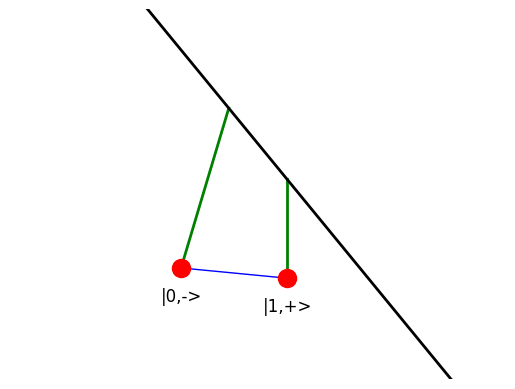

In [100]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.lines import Line2D

# Parameters
num_pendulums = 2
plane_angle_deg = -45
plane_angle = np.radians(plane_angle_deg)
spacing = 1.5
bob_target_y = -2
theta_disp = np.radians(-20)  # angular displacement of first pendulum

# Rotation matrix
cos_a = np.cos(plane_angle)
sin_a = np.sin(plane_angle)

def rotate(x, y, angle):
    xr = x * cos_a - y * sin_a
    yr = x * sin_a + y * cos_a
    return xr, yr

# Step 1: Build all pendulums vertically
x_anchors, y_anchors = [], []
x_bobs, y_bobs = [], []
rod_lengths = []

for i in range(num_pendulums):
    local_x = (i - (num_pendulums - 1) / 2) * spacing
    xa, ya = rotate(local_x, 0, plane_angle)
    xb = xa
    yb = bob_target_y
    L = ya - yb  # vertical rod length

    x_anchors.append(xa)
    y_anchors.append(ya)
    x_bobs.append(xb)
    y_bobs.append(yb)
    rod_lengths.append(L)

# Step 2: Displace first pendulum
xa = x_anchors[0]
ya = y_anchors[0]
L = rod_lengths[0]

# Apply angular displacement θ from vertical
xb = xa + L * np.sin(theta_disp)
yb = ya - L * np.cos(theta_disp)

# Replace bob position
x_bobs[0] = xb
y_bobs[0] = yb

# Plotting
fig, ax = plt.subplots()

# Draw spring connectors
for i in range(num_pendulums - 1):
    x0, y0 = x_bobs[i], y_bobs[i]
    x1, y1 = x_bobs[i + 1], y_bobs[i + 1]
    linewidth = 1 + i * 1.5
    ax.plot([x0, x1], [y0, y1], 'b-', linewidth=linewidth)

# Draw pendulums
for xa, ya, xb, yb in zip(x_anchors, y_anchors, x_bobs, y_bobs):
    ax.plot([xa, xb], [ya, yb], 'g-', linewidth=2)
    ax.plot(xb, yb, 'ro', markersize=13)

# Inclined plane
plane_x = [-4, 4]
plane_y = [x * np.tan(plane_angle) for x in plane_x]
ax.plot(plane_x, plane_y, 'k-', linewidth=2)

# Legend
# spring_legend = Line2D([0], [0], color='blue', linewidth=3, label='Coupling (⟶ stronger)')
# ax.legend(handles=[spring_legend])

# Clean visuals
ax.set_xlim(-4.5, 4.5)
ax.set_ylim(-3.5, 2)
ax.set_xticks([])
ax.set_yticks([])
ax.grid(False)
for spine in ax.spines.values():
    spine.set_visible(False)

# Label for increasing n
# ax.text(0, -3, "increasing n ⟶", ha='center', fontsize=12)

# Labels
ax.text(x_bobs[0], y_bobs[0] - 0.5, "|0,->", ha='center', fontsize=12)
ax.text(x_bobs[0], y_bobs[0] - 0.5, "|0,->", ha='center', fontsize=12)
ax.text(x_bobs[1], y_bobs[1] - 0.5, "|1,+>", ha='center', fontsize=12)

# Save figure
plt.savefig("./img/pendulums-dsc-01.png", format="png", bbox_inches="tight")
# plt.show()
